# Python For Data Science: Studying Gapminder Data

**First step to study any dataset is to install all the necessary packages, remember if you are using Anaconda or miniconda it is recommended to replace "pip" with "conda" while installing these packages. It can also be the case that for windows you have to open anaconda prompt and install these packages.**

In [1]:
!pip install pandas
!pip install matplotlib
!pip install pyplot
!pip install scipy
!pip install numpy

We will be using these packages when they are needed while answering the questions.

**Q1: Read in the gapminder_clean.csv data as a pandas DataFrame.**   
Here we will read the data in "gapminder_clean.csv". We can also try to understand the data we have briefly by using db.head() and db.info(). 

In [110]:
import pandas as pd
gapminder_df= pd.read_csv("D:\python\BRN\gapminder_clean.csv")
gapminder_df.drop('Unnamed: 0', inplace=True, axis=1)
#display(gapminder_df.head())
display(gapminder_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2607 entries, 0 to 2606
Data columns (total 19 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Country Name                                             2607 non-null   object 
 1   Year                                                     2607 non-null   int64  
 2   Agriculture, value added (% of GDP)                      1428 non-null   float64
 3   CO2 emissions (metric tons per capita)                   2193 non-null   float64
 4   Domestic credit provided by financial sector (% of GDP)  1743 non-null   float64
 5   Electric power consumption (kWh per capita)              1369 non-null   float64
 6   Energy use (kg of oil equivalent per capita)             1410 non-null   float64
 7   Exports of goods and services (% of GDP)                 1809 non-null   float64
 8   Fertility rate, total (birth

None

We can see from the data that it contains various demographics to study and compare the growth of many countries from 1952 to 2007.

**Q2: Filter the data to include only rows where Year is 1962 and then make a scatter plot comparing 'CO2 emissions (metric tons per capita)' and gdpPercap for the filtered data.**   

Here we filter the data for the year 1962 and then plot the "CO2 emissions" vs "GDP per capita". There was an outliner on the top right side thus I decided to go with log scale for both x and y axis. You can omit the same and observe the difference it makes on the plot.

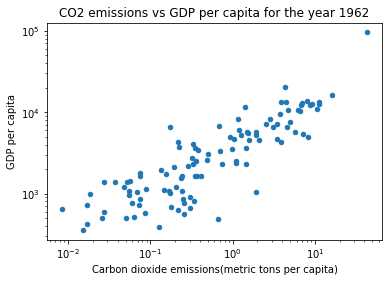

In [111]:
import matplotlib.pyplot as plt
data_year_62=gapminder_df[gapminder_df["Year"]==1962]
data_year_62.plot(kind="scatter", x='CO2 emissions (metric tons per capita)',y="gdpPercap", logx= True, logy= True)
plt.xlabel("Carbon dioxide emissions(metric tons per capita)")
plt.ylabel("GDP per capita")
plt.title("CO2 emissions vs GDP per capita for the year 1962")
plt.show()

We can observe from the plot that there is a linear correlation between the GDP per capita and CO2 emissions. This maybe caused because developed countries (those with high GDP per capita) would produce much more CO2, this depends on the commodities used by the average person (carbon footprint) in daily life as well as the industrial development of the country.

**Q3: On the filtered data, calculate the Pearson correlation of 'CO2 emissions (metric tons per capita)' and gdpPercap. What is the Pearson R value and associated p value?**  
To calculate the Pearson correlation, it is important that the input doesn't consist of null values as that will end up in errors. Thus, we will have to either remove the rows with null values or replace the values, here we are going with removing the rows with null values for the required columns, as replacing them could end up effecting our Pearson correlation.


In [112]:
from scipy import stats
#data_year_62.info() to understand the data, mainly number of null values.
year_62_clean=data_year_62.dropna(subset=(['CO2 emissions (metric tons per capita)',"gdpPercap"]))
pearsonr_p= stats.pearsonr(year_62_clean['CO2 emissions (metric tons per capita)'],year_62_clean['gdpPercap'])
print("Pearson R value:" + str(pearsonr_p[0]) +" Associated p value: "+ str(pearsonr_p[1]))
#year_62_clean.info() to check the number of non-null values.  

Pearson R value:0.9260816725019472 Associated p value: 1.1286792210038754e-46


First, we assume that in our null hypothesis that there is no correlation between our data sets. But when we do our test for Pearson correlation, we get a Pearson R value (0.926)>0, thus showing us that the data sets used are positively (direct variation) correlated.    
But then comes the question is our test significant?      
We have an associated p value of 1.1286792210038754e-46 which is good as lower the p-value, the greater the statistical significance of the observed difference. That means we can reject our null hypothesis and our data is positively correlated and is statistically significant.      
But this has only one issue, that the dataset we have consists only of 108 values, for a good test it is preferable to have a very large dataset of 500 or more. Even though we have a small dataset, it is clearly visible from the plot and the Pearson correlation test that there is a positive relation between 'CO2 emissions (metric tons per capita)' and 'GDP per capita'.


**Q4: On the unfiltered data, answer "In what year is the correlation between 'CO2 emissions (metric tons per capita)' and 'gdpPercap' the strongest?" Filter the dataset to that year for the next step.**
To find the year where the correlation is strongest, we just need to perform the Pearson correlation test for every year in the dataset and then sort the Pearson R value for all the years in descending order. 

PS: Due to [SettingWithCopyWarning](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy) I have used df.copy().loc(). 

In [113]:
years=list(gapminder_df["Year"].unique())
pearson_corrx=list()
for year in years:
    year_x=gapminder_df.copy().loc[gapminder_df["Year"]==year]
    year_x.dropna(subset=(['CO2 emissions (metric tons per capita)',"gdpPercap"]),inplace=True)
    pearson_corrx.append([year,stats.pearsonr(year_x['CO2 emissions (metric tons per capita)'],year_x['gdpPercap'])[0]])
pearson_corrx.sort(reverse=True, key=(lambda x:x[1]))
display(pearson_corrx) #to view list of year and their respective Pearson R values: The year with max correlation was 1967
yearx=pearson_corrx[0][0]
year_highest_corr=gapminder_df.copy().loc[gapminder_df["Year"]==yearx]
#display(year_highest_corr) to display the dataset for 1967


[[1967, 0.938791838506331],
 [1962, 0.9260816725019472],
 [1972, 0.8428985866268464],
 [1982, 0.8166384024309291],
 [1987, 0.8095530841191891],
 [1992, 0.8094316203754854],
 [1997, 0.8081396359866697],
 [2002, 0.8006420656289517],
 [1977, 0.79283359359045],
 [2007, 0.7204168835195922]]

From the above we find out that in 1967 the correlation between 'CO2 emissions (metric tons per capita)' and 'gdpPercap' was the strongest.

**Q5: Using plotly or bokeh, create an interactive scatter plot comparing 'CO2 emissions (metric tons per capita)' and gdpPercap, where the point size is determined by pop (population) and the color is determined by the continent.**   
As mentioned in the previous question, we will be using the dataset for the year where the correlation is the highest, i.e. 1967.

In [126]:
import plotly.express as px
year_highest_corr.dropna(subset=(['CO2 emissions (metric tons per capita)',
                          "gdpPercap",'pop','Country Name','continent']),inplace=True)
px.scatter(data_frame= year_highest_corr,
           x='gdpPercap',
           y='CO2 emissions (metric tons per capita)',
           size='pop',
           color='continent',
           title="GDP per Capita vs CO2 emissions(metric tons per capita) in year 1967",
           labels={'gdpPercap':'GDP per capita'},
           log_x=True,
           log_y=True,hover_name= 'Country Name',height=600, size_max=100)


**Q6: What is the relationship between continent and 'Energy use (kg of oil equivalent per capita)'? (Stats test needed)**    
Let us first see graphically what is the relationship between continents and energy use. Then we will conduct the stat test. 

In [125]:
import numpy as np
clean_continentVsEnergy=gapminder_df.copy().loc[:,['Energy use (kg of oil equivalent per capita)','continent','Year']]
clean_continentVsEnergy=clean_continentVsEnergy.dropna(how='all',subset=(['Energy use (kg of oil equivalent per capita)','continent','Year']))
clean_continentVsEnergy.dropna(subset=(['continent']),inplace=True)
clean_continentVsEnergy['Energy use (kg of oil equivalent per capita)'].fillna(0)
mean_contVsEnergy_perYear=clean_continentVsEnergy.groupby(['continent','Year'],as_index=False)['Energy use (kg of oil equivalent per capita)'].mean()

n= [clean_continentVsEnergy[clean_continentVsEnergy['Year']==year]
    .loc[:,'Energy use (kg of oil equivalent per capita)'].count()
    for year in years ]
n_mean=sum(n)/len(n)
x=0
#display(n)

std_dev_contVSEnergy_perYear= clean_continentVsEnergy.groupby(['continent','Year'],as_index=False)['Energy use (kg of oil equivalent per capita)'].std()
#standard error of mean: both methods show similar results although the later considers the change in n in each year
#std_dev_contVSEnergy_perYear['Energy use (kg of oil equivalent per capita)']/= np.sqrt(n_mean)
for year in years:
    std_dev_contVSEnergy_perYear.loc[std_dev_contVSEnergy_perYear['Year']==year ,['Energy use (kg of oil equivalent per capita)']]/= np.sqrt(n[x])
    x+=1
#display(std_dev_contVSEnergy_perYear)
fig_a=px.bar(data_frame=mean_contVsEnergy_perYear, 
           error_y=std_dev_contVSEnergy_perYear['Energy use (kg of oil equivalent per capita)'],
           x='continent',
           y='Energy use (kg of oil equivalent per capita)',
           color='continent',
           title="Continents vs Energy use (kg of oil equivalent per capita) 1962- 2007",
           labels={'continent':'Continents'},
           animation_frame='Year', hover_name='continent', height= 600, barmode='group')
fig_a.update_yaxes(range = [0,7000])
fig_a.show()

In [124]:
#the median can be a very usefull to display data graphically especially for data with many outliners as in gapminder
clean_CvE_2=gapminder_df.copy().loc[:,['Energy use (kg of oil equivalent per capita)','continent','Year','Country Name']]
clean_CvE_2=clean_CvE_2.dropna(how='all',subset=(['Energy use (kg of oil equivalent per capita)','continent','Year','Country Name']))
clean_CvE_2.dropna(subset=(['continent']),inplace=True)
fig=px.box(data_frame=clean_CvE_2, 
           x='continent',
           y='Energy use (kg of oil equivalent per capita)',
           color='continent',
           title="Continents vs Energy use (kg of oil equivalent per capita) 1962- 2007",
           labels={'continent':'Continents'},
           animation_frame='Year', hover_name='Country Name',points="all")
fig.update_yaxes(range = [0,15000])
fig.show()

To show the statistical relation between continent and Energy use we will use [One-Way ANOVA](https://libguides.library.kent.edu/SPSS/OneWayANOVA) for each year. 

In [117]:
#stat test for Q6 : we can use .dropna() instead of .fillna() but that gives nan values for year 1963 and 1967 as Africa has no values in those year.
#all the years had significant p values.
for year in years:
    Asia= gapminder_df.loc[(gapminder_df['continent']=="Asia" )&(gapminder_df['Year']==year),
                         ['Energy use (kg of oil equivalent per capita)']].fillna(0)
    Europe= gapminder_df.loc[(gapminder_df['continent']=="Europe" )&(gapminder_df['Year']==year),
                         ['Energy use (kg of oil equivalent per capita)']].fillna(0)
    Africa=gapminder_df.loc[(gapminder_df['continent']=="Africa" )&(gapminder_df['Year']==year),
                         ['Energy use (kg of oil equivalent per capita)']].fillna(0)
    Americas=gapminder_df.loc[(gapminder_df['continent']=="Americas" )&(gapminder_df['Year']==year),
                         ['Energy use (kg of oil equivalent per capita)']].fillna(0)
    Oceania=gapminder_df.loc[(gapminder_df['continent']=="Oceania" )&(gapminder_df['Year']==year),
                         ['Energy use (kg of oil equivalent per capita)']].fillna(0)
    f,p= f_anova=stats.f_oneway(Asia, Europe, Africa, Americas, Oceania)
    print("One-way ANOVA f-statistics for continent vs Energy use(kg of oil equivalent per capita) the year "+str(year)+":"+str(f))
    print("One-way ANOVA p-value for continent vs Energy use(kg of oil equivalent per capita) the year "+str(year)+":"+str(p)+"\n")



One-way ANOVA f-statistics for continent vs Energy use(kg of oil equivalent per capita) the year 1962:[12.46744922]
One-way ANOVA p-value for continent vs Energy use(kg of oil equivalent per capita) the year 1962:[1.52140837e-08]

One-way ANOVA f-statistics for continent vs Energy use(kg of oil equivalent per capita) the year 1967:[13.49785945]
One-way ANOVA p-value for continent vs Energy use(kg of oil equivalent per capita) the year 1967:[3.76618486e-09]

One-way ANOVA f-statistics for continent vs Energy use(kg of oil equivalent per capita) the year 1972:[10.73839603]
One-way ANOVA p-value for continent vs Energy use(kg of oil equivalent per capita) the year 1972:[1.69174407e-07]

One-way ANOVA f-statistics for continent vs Energy use(kg of oil equivalent per capita) the year 1977:[11.93080244]
One-way ANOVA p-value for continent vs Energy use(kg of oil equivalent per capita) the year 1977:[3.18447968e-08]

One-way ANOVA f-statistics for continent vs Energy use(kg of oil equivalent 

As p<0.5 for all the years after doing one-way ANOVA it is suggested to do Tukey's or Bonferroni's test. We will conduct Tukey's test.

In [59]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
for year in years:
    gapmind_tukey=gapminder_df.loc[gapminder_df['Year']==year,
                         ['Energy use (kg of oil equivalent per capita)','continent']].dropna()
    tukey = pairwise_tukeyhsd(endog=gapmind_tukey['Energy use (kg of oil equivalent per capita)'],
                          groups=gapmind_tukey['continent'],
                          alpha=0.05)
    print("\n Stats of Tukey's test " +str(year) + " : \n")
    print(tukey)


 Stats of Tukey's test 1962 : 

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
 group1   group2  meandiff  p-adj    lower      upper    reject
---------------------------------------------------------------
Americas    Asia  -4109.321 0.0071 -7214.7883 -1003.8536   True
Americas  Europe -3326.1493  0.001 -5211.0965 -1441.2021   True
Americas Oceania -2630.8551 0.0403 -5166.4586   -95.2516   True
    Asia  Europe   783.1717 0.8169 -1818.3026   3384.646  False
    Asia Oceania  1478.4658 0.5496 -1627.0015  4583.9332  False
  Europe Oceania   695.2942 0.7133  -1189.653  2580.2414  False
---------------------------------------------------------------

 Stats of Tukey's test 1967 : 

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
 group1   group2  meandiff  p-adj    lower      upper    reject
---------------------------------------------------------------
Americas    Asia -4463.0064 0.0091 -7948.9079  -977.1049   True
Americas  Europe -4005.3293  0.001 -61

We can see that there are many cases where there is no significant relationship between countries each year.   
To help read the data, if the p-adj is less than 0.05 we reject the null hypothesis that there is no relationship, meaning that there is a relationship between those countries and if p-adj>0.05, it shows that the relationship between those countries is not significant.    
We can note that Africa is not there in 1962 and 1967 as there is no data for Africa in those years. This is also visible in the plots above.

**Q7: Is there a significant difference between Europe and Asia with respect to 'Imports of goods and services (% of GDP)' in the years after 1990? (Stats test needed)**
For this we will use [Independent Samples t-Test ](https://libguides.library.kent.edu/SPSS/IndependentTTest)

In [118]:
for year in years[6:]:
    Asia= gapminder_df.loc[(gapminder_df['continent']=="Asia" )&(gapminder_df['Year']==year),
                         ['Imports of goods and services (% of GDP)']].fillna(0)
    Europe= gapminder_df.loc[(gapminder_df['continent']=="Europe" )&(gapminder_df['Year']==year),
                         ['Imports of goods and services (% of GDP)']].fillna(0)
    t,p=stats.ttest_ind(Asia, Europe)
    print("The t-statistics for continent vs Energy use(kg of oil equivalent per capita) the year "+str(year)+":"+str(t))
    print("The p-value for continent vs Energy use(kg of oil equivalent per capita) the year "+str(year)+":"+str(p)+"\n")


The t-statistics for continent vs Energy use(kg of oil equivalent per capita) the year 1992:[0.9886793]
The p-value for continent vs Energy use(kg of oil equivalent per capita) the year 1992:[0.32722959]

The t-statistics for continent vs Energy use(kg of oil equivalent per capita) the year 1997:[0.89167893]
The p-value for continent vs Energy use(kg of oil equivalent per capita) the year 1997:[0.37652117]

The t-statistics for continent vs Energy use(kg of oil equivalent per capita) the year 2002:[0.57340995]
The p-value for continent vs Energy use(kg of oil equivalent per capita) the year 2002:[0.5687476]

The t-statistics for continent vs Energy use(kg of oil equivalent per capita) the year 2007:[0.05620269]
The p-value for continent vs Energy use(kg of oil equivalent per capita) the year 2007:[0.95538778]



As we can see in all the years p-value> 0.05, this means that there is no significant difference between Europe and Asia with respect to 'Imports of goods and services (% of GDP)' in the years after 1990.

**Q8: What is the country (or countries) that has the highest 'Population density (people per sq. km of land area)' across all years? (i.e., which country has the highest average ranking in this category across each time point in the dataset?)**

In [84]:
population_rank=gapminder_df.copy().loc[:, ['Population density (people per sq. km of land area)' ,'Country Name','Year']]
population_rank['Population density (people per sq. km of land area)'].dropna()
population_rank['population_density_ranking']=population_rank.groupby('Year')['Population density (people per sq. km of land area)'].rank(ascending=False)
population_rank.groupby("Country Name")['population_density_ranking'].mean().sort_values()

Country Name
Macao SAR, China          1.5
Monaco                    1.5
Hong Kong SAR, China      3.1
Singapore                 3.9
Gibraltar                 5.0
                        ...  
Mauritania              252.3
Namibia                 253.8
Mongolia                254.8
Greenland               255.8
South Sudan               NaN
Name: population_density_ranking, Length: 263, dtype: float64

As we can see Macao SAR, China and Monaco both with avg. ranking of 1.5 have the highest average ranking for 'Population density (people per sq. km of land area)' across all years.

**Q9: What country (or countries) has shown the greatest increase in 'Life expectancy at birth, total (years)' since 1962?**

In [99]:
lifeExpectancy= gapminder_df.copy().pivot(index='Country Name', columns='Year', values='Life expectancy at birth, total (years)').dropna()
lifeExpectancy["Increase in life expectancy"]= lifeExpectancy[2007]-lifeExpectancy[1962]
lifeExpectancy["Increase in life expectancy"].sort_values(ascending= False)

Country Name
Maldives              36.916146
Bhutan                33.198951
Timor-Leste           31.085146
Tunisia               30.860756
Oman                  30.823098
                        ...    
Belarus                1.567585
Russian Federation     0.476146
Ukraine               -0.923902
Lesotho               -2.520024
Zimbabwe              -8.100146
Name: Increase in life expectancy, Length: 236, dtype: float64

We can see that Maldives had the greatest increase in 'Life expectancy at birth, total (years)' since 1962 with increase of 36.916 from 1962 to 2007.